In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
SHG = pd.read_csv('cleaned_SHG_Data.csv')
SHG.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


# 2(a) Which distribution channels contribute the most to bookings, and how does the average daily rate (ADR) differ across these channels?

## a(i) Which distribution channels contribute the most to bookings

### Step 1: 
* Preprocess Data: Filtered out where booking was not completed to focus on actual (non-canceled booking)

In [4]:
# Keep only completed (non-canceled) bookings
SHG_valid = SHG[SHG['Cancelled (0/1)'] == 0]

In [16]:
# Total Bookings by Channel
booking_counts = SHG_valid.groupby('Distribution Channel')['Booking ID'].count().reset_index(name='Booking Count')
# Sort by count
booking_counts = booking_counts.sort_values(by='Booking Count', ascending=False)

In [17]:
booking_counts

,Distribution Channel,Booking Count
3,Online Travel Agent,42012
2,Offline Travel Agent,15758
1,Direct,12056
0,Corporate,5184
4,Undefined,1


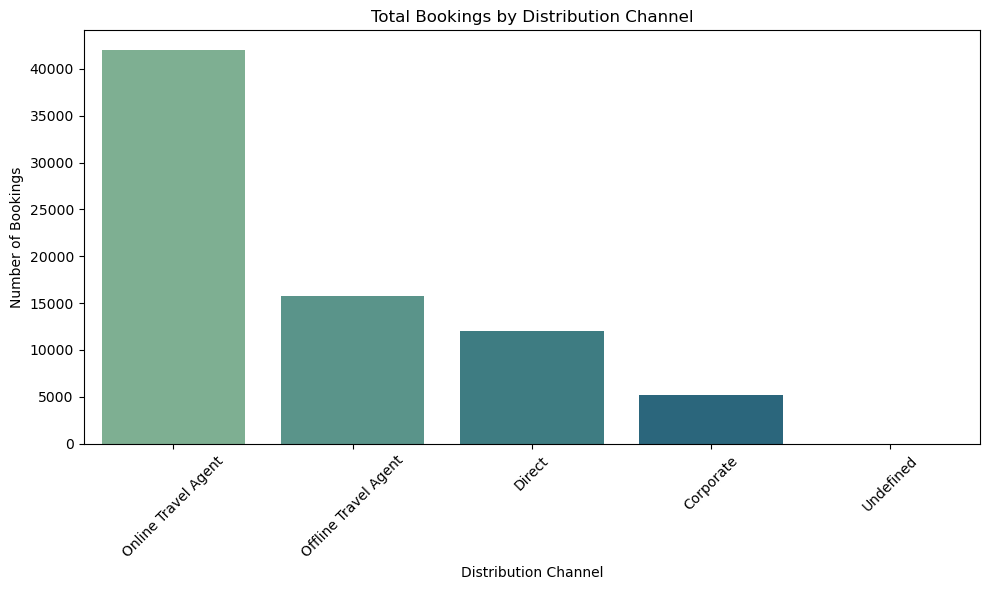

In [20]:
# Bar Plot of Booking Counts

plt.figure(figsize=(10, 6))
sns.barplot(data=booking_counts, x='Distribution Channel', y='Booking Count', palette='crest')
plt.title('Total Bookings by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## a(ii) how does the average daily rate (ADR) differ across these channels?

In [21]:
# Group by Channel and Compute Average ADR

adr_by_channel = SHG_valid.groupby('Distribution Channel')['Avg Daily Rate'].mean().reset_index(name='Average ADR')
adr_by_channel = adr_by_channel.sort_values(by='Average ADR', ascending=False)

In [32]:
SHG_valid = SHG_valid[SHG_valid['Distribution Channel'] != 'Undefined']

In [35]:
SHG_valid_unique = SHG_valid.drop_duplicates(subset='Booking ID')

In [36]:
adr_by_channel = SHG_valid_unique.groupby('Distribution Channel')['Avg Daily Rate'].mean().reset_index(name='Average ADR')
adr_by_channel = adr_by_channel.sort_values(by='Average ADR', ascending=False)

In [37]:
adr_by_channel

,Distribution Channel,Average ADR
3,Online Travel Agent,108.703109
1,Direct,106.281934
2,Offline Travel Agent,83.457736
0,Corporate,67.485147


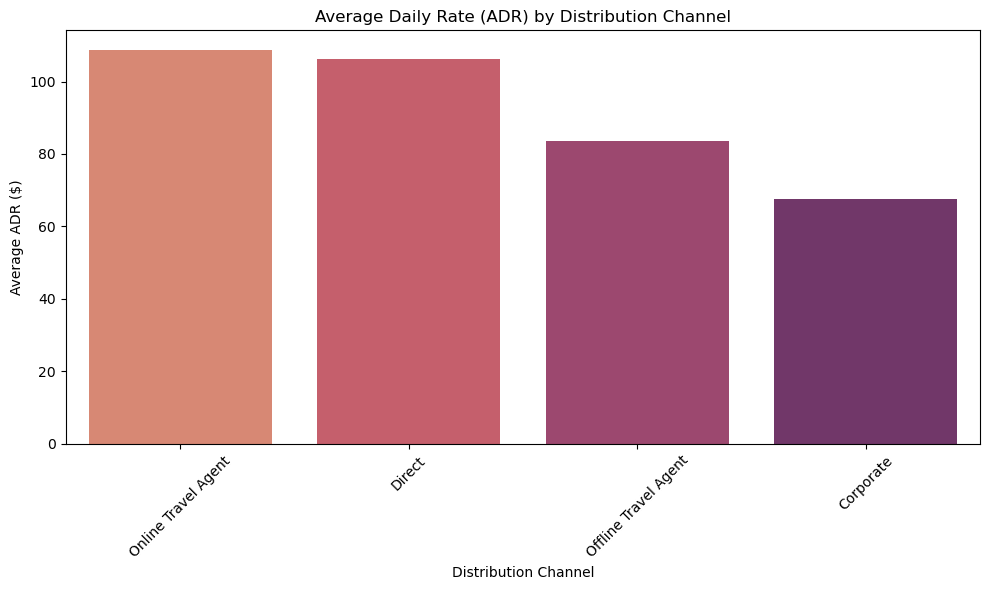

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(data=adr_by_channel, x='Distribution Channel', y='Average ADR', palette='flare')
plt.title('Average Daily Rate (ADR) by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Average ADR ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()